## Lego DataSet Exploratory Data Analysis
### DataSci200 Project 2
#### https://www.kaggle.com/datasets/rtatman/lego-database?resource=download

![alt text](downloads_schema.png "Lego Scema")

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [2]:
# Import Individual Lego DataFrames
sets = pd.read_csv("data/sets.csv.gz")
themes = pd.read_csv("data/themes.csv.gz")
# Import IMDB title data
imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_51460\1123985115.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")


In [3]:
# Clean Up the IMDB dataset
imdb_titles.replace('\\N', np.nan, inplace=True)
imdb_titles.dropna(subset=["startYear","titleType","primaryTitle", "runtimeMinutes"], inplace=True)
# Filter start year for lego data sets
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2022)]
# Filter to only Movies 
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
# Filter out short films
imdb_titles["runtimeMinutes"] = imdb_titles["runtimeMinutes"].astype(int)
imdb_titles = imdb_titles[imdb_titles["runtimeMinutes"]>=60]

In [4]:
# Clean Up lego Data Sets
# filter to appropriate years
sets = sets.loc[sets.year <= 2022]
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df = sets_and_themes_df.loc[sets_and_themes_df.year <= 2022]
# Cleaning Sets and Themes by populating parent theme
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", how="left", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)
# Handling Nulls in the Parent Theme Name Columns
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 147, "parent_theme"] = "Pirates I, Pirates II, Pirates III"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 296, "parent_theme"] = "Dino Island, Desert, Orient Expedition, Jungle"
sets_and_themes_df.loc[sets_and_themes_df.parent_id == 561, "parent_theme"] = "The Lord of the Rings, The Hobbit"

In [5]:
theme_count = pd.DataFrame(sets_and_themes_df.name_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Star Wars,872
Technic,839
Key Chain,674
Books,598
Friends,520
Gear,481
Basic Set,473
Ninjago,459
Bionicle,435
Supplemental,435


In [6]:
theme_count.sort_index().head(1000)

,Count
12V,52
4 Juniors,23
4.5V,86
9V,100
Action Wheelers,9
Advent,6
Adventurers,1
Agents,13
Airlines,16
Airport,55


##### Some observations of the theme Data
Many themes could be grouped into superthemes like: 
- Aquaraiders
- Blacktron
- Space 
- Dinosaurs
- Disney
- Knights
- Jurrassic Park
- Matoran, Ninja
- Pirates, Planet
- Indiana Jones (Raiders of lost Ark, Temple of Doom,)
- Minifigures
- Spider-Man
- Star Wars
- The Lord of the Rings (The Fellowship of the Ring, The Hobbit, The Lord of the Rings, The Return of the King, The Two Towers)
- Toa
- Western

These grouping may be key to elucidating some of the trends with time and films so we will use the parent them going forward. We will need to impute the parent theme accordingly

The below plot shows the most common themes by number of sets included within the theme

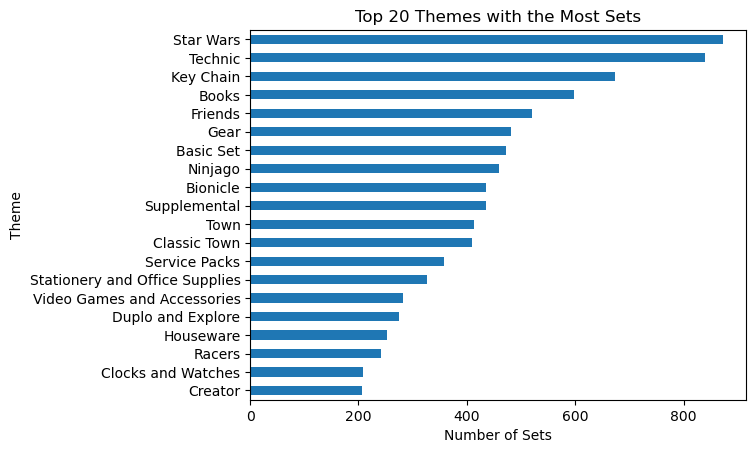

In [7]:
theme_count[:20].plot.barh(legend=False)
plt.ylabel("Theme")
plt.xlabel("Number of Sets")
plt.title("Top 20 Themes with the Most Sets")
plt.gca().invert_yaxis()
plt.show()

In [8]:
# Most Popular Theme By Year
counts_by_year_by_theme = sets_and_themes_df[["year", "parent_theme","set_num"]].groupby(["year", "parent_theme"]).count().sort_values(by="year").reset_index()
counts_by_year_by_theme["max_sets"] = counts_by_year_by_theme[["year", "set_num"]].groupby("year").transform(max)
max_counts_by_year_by_theme = counts_by_year_by_theme[counts_by_year_by_theme.set_num == counts_by_year_by_theme.max_sets]
max_counts_by_year_by_theme

,year,parent_theme,set_num,max_sets
0,1949,System,5,5
1,1950,System,6,6
2,1953,System,4,4
3,1954,System,14,14
6,1955,System,35,35
7,1956,System,16,16
10,1957,System,20,20
12,1958,System,57,57
13,1959,System,4,4
14,1960,System,1,1


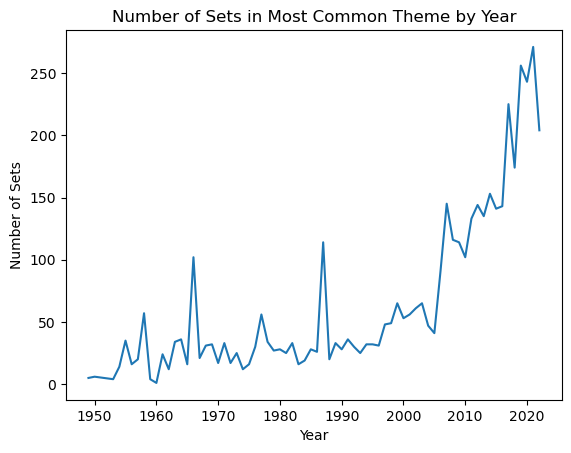

In [9]:
sns.lineplot(data=max_counts_by_year_by_theme, x="year", y="max_sets")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of Sets in Most Common Theme by Year")
plt.show()

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_51460\683201041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)


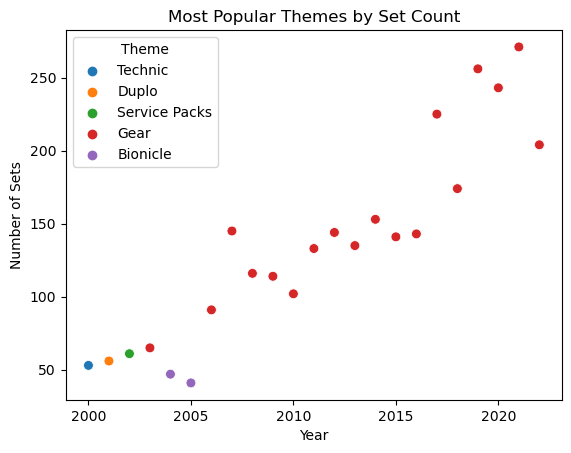

In [13]:
max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)
max_counts_by_year_by_theme_since_2000 = max_counts_by_year_by_theme[max_counts_by_year_by_theme.year >= 2000]
sns.scatterplot(data=max_counts_by_year_by_theme_since_2000, x="year", y="max_sets", hue="Theme", s=50)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Most Popular Themes by Set Count")
plt.show()

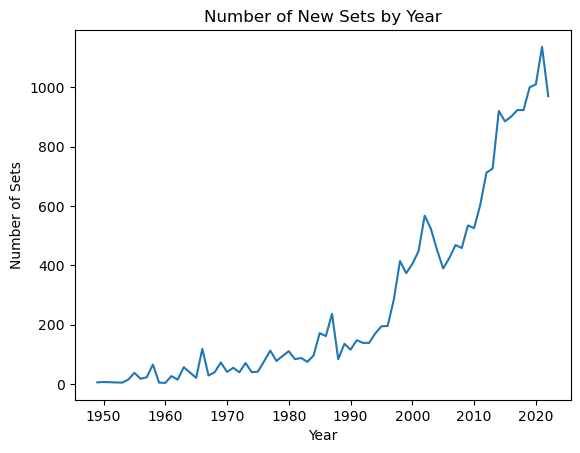

In [14]:
sets = sets.loc[sets.year <= 2022]
new_sets_by_year = sets[["year","set_num"]].groupby(["year"]).count().reset_index()
sns.lineplot(data=new_sets_by_year, x="year", y="set_num")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of New Sets by Year")
plt.show()

In [19]:
new_sets_by_year.head(80)

,year,set_num
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,37
5,1956,17
6,1957,22
7,1958,65
8,1959,4
9,1960,3


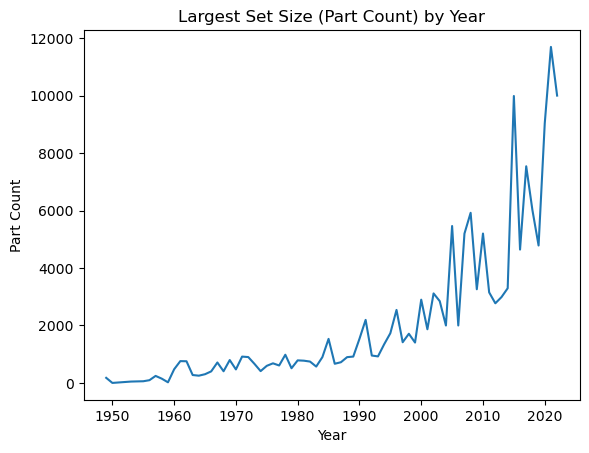

In [12]:
max_part_number_by_year = sets.groupby("year")["num_parts"].max()
max_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Largest Set Size (Part Count) by Year")
plt.show()

In [16]:
max_part_number_by_year.head()

year
1949    178
1950      1
1953     48
1954     54
1955     59
Name: num_parts, dtype: int64

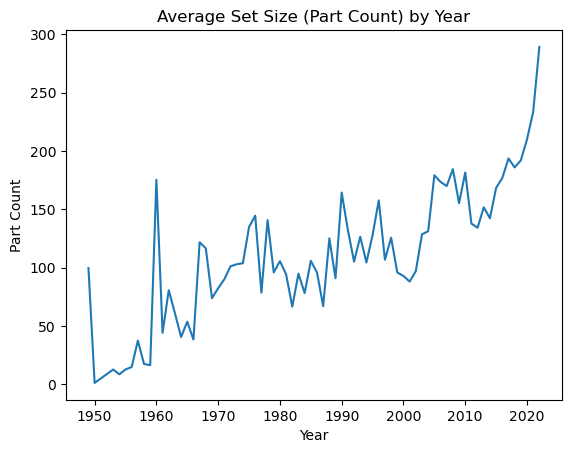

In [20]:
avg_part_number_by_year = sets.groupby("year")["num_parts"].mean()
avg_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Average Set Size (Part Count) by Year")
plt.show()

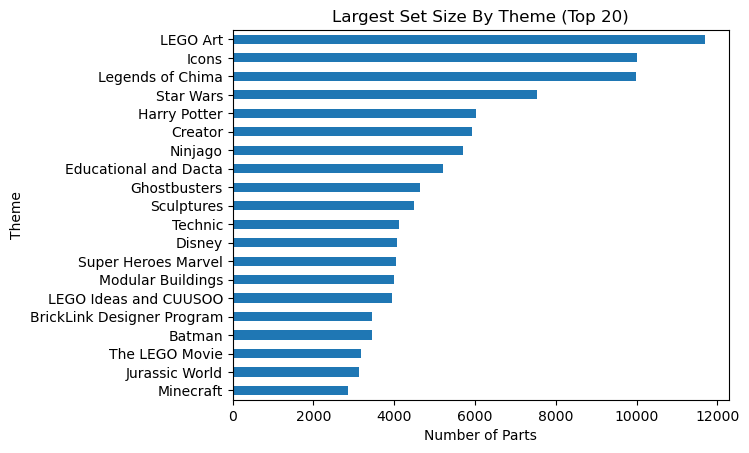

In [21]:
max_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].max().sort_values(ascending=False)
max_parts_by_theme[0:20].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Largest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

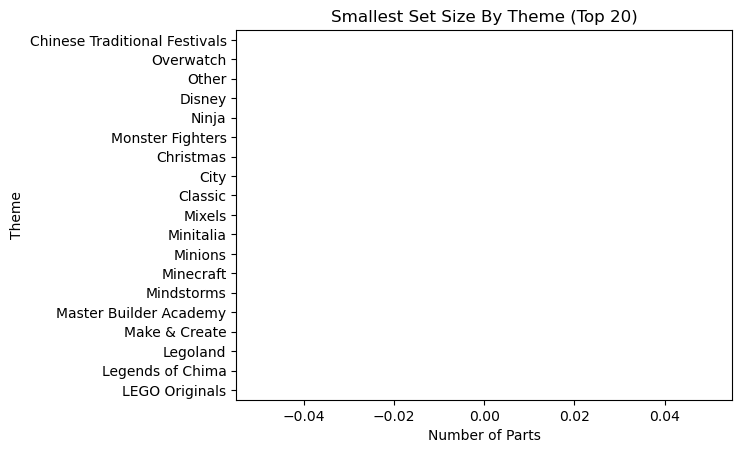

In [22]:
min_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].min().sort_values(ascending=False)
min_parts_by_theme[-20:-1].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Smallest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

<AxesSubplot:>

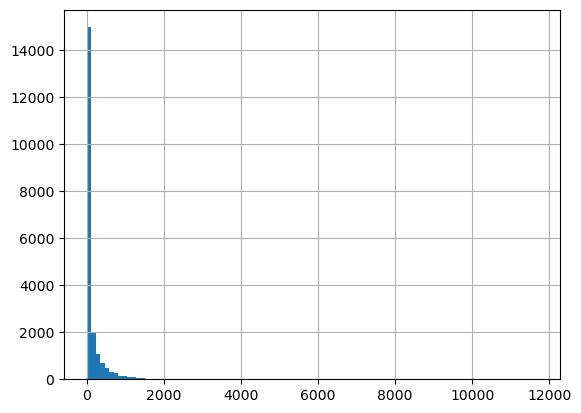

In [23]:
sets_and_themes_df["num_parts"].hist(bins=100)

In [24]:
theme_count.sort_index()

,Count
12V,52
4 Juniors,23
4.5V,86
9V,100
Action Wheelers,9
Advent,6
Adventurers,1
Agents,13
Airlines,16
Airport,55


In [25]:
theme_count = pd.DataFrame(sets_and_themes_df.parent_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Gear,3091
Duplo,1263
Star Wars,889
Collectible Minifigures,803
City,792
Service Packs,781
Town,764
Educational and Dacta,655
Books,606
Technic,540


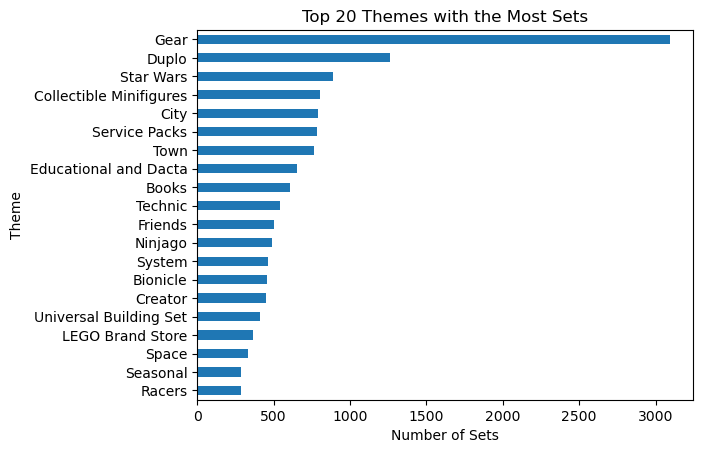

In [26]:
theme_count[:20].plot.barh(legend=False)
plt.ylabel("Theme")
plt.xlabel("Number of Sets")
plt.title("Top 20 Themes with the Most Sets")
plt.gca().invert_yaxis()
plt.show()

#### Movie Related Themes
- Star Wars
- Harry Potter
- The Hobbit/The Lord of the Rings
- Pirates Of The Caribean
- Teenage Mutant Ninja Turtles
- Indiana Jones
- Jurrasic World
- The Lone Ranger
- The Lego Movie 
- Avatar
- Batman
- Prince of Persia

In [ ]:
imdb_titles.head()

For IMDB data I am only interested in movies overlapping with the lego data sets and Movies or TV
- Filter out by year
- filter out by titleType

A big assumption here is that I am only looking at box office feature films and not short, videos, tv, and streaming content associated with these franchises

In [ ]:
# imdb_titles["titleType"].unique()
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
print(f"IMDB is of shape {imdb_titles.shape} after movie filter")

In [ ]:
theme_imdb = imdb_titles[imdb_titles["primaryTitle"].str.contains(r'\blord of the rings\b', regex=True, case=False)]
theme_imdb

In [ ]:
franchise_dict = {"Star Wars": {"regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]}}

In [ ]:
def null_years_to_zero(df, df_imdb):
    min_year = np.min(df_imdb["startYear"])
    max_year = np.max(df_imdb["startYear"])
    df = df.set_index('year')
    df_new = pd.DataFrame({"year":range(min_year-5,min(2022,max_year+5)), "set_num": 0}).set_index("year")
    df_new["set_num"]=df["set_num"]
    df_new.fillna(0, inplace=True)
    df_new.reset_index(inplace=True)
    return df_new

In [ ]:
def plot_movies_and_lego_sets(lego_df, imdb_df, movie_dict, name):
    pattern = movie_dict[name]["regex"]
    movie_list = movie_dict[name]["movies"]
    lego = lego_df.loc[lego_df["parent_theme"].str.contains(pattern, regex=True, case=False)]
    lego = pd.DataFrame(lego.groupby("year")["set_num"].count()).reset_index()
    imdb = imdb_df[imdb_df["primaryTitle"].isin(movie_list)].sort_values(by="startYear").reset_index()
    cmap = plt.cm.get_cmap('tab20', len(imdb))
    for i in range(len(imdb)):
        year = imdb.loc[i, "startYear"]
        title = imdb.loc[i, "primaryTitle"]
        color = cmap(i)
        plt.axvline(x=year, c=color, label=f"{year}: {title}")
    lego = null_years_to_zero(lego, imdb)
    sns.lineplot(data=lego, x="year", y="set_num", marker="o")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel("Number of Sets")
    ticks = ax.get_xticks()
    new_labels = [f'{int(tick):.0f}' for tick in ticks]
    ax.set_xticklabels(new_labels)
    plt.xlabel("Year")
    plt.title("Number of Lego Sets by Year with Movie Releases")
    plt.show()

In [ ]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Star Wars")

In [ ]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Harry Potter")

In [ ]:
themes.loc[themes["name"].str.contains(r'lord', regex=True, case=False)]